<a href="https://colab.research.google.com/github/m4gnel/ASIET/blob/main/S5_AI/ML/LAB/Boston_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import pandas as pd
import numpy as np
import matplotlib.pyploat as plt

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Load the Boston dataset from the .CSV file
try:
    boston_df = pd.read_csv('Boston.csv')
except FileNotFoundError:
    print("Error: 'Boston.csv' not found. Please ensure the dataset files is in the ")
    exit()

In [9]:
# Display the firt few rows and general info to understand the data
print("----------Dataset Head----------")
print(boston_df.head())
print("\n----------Data Information----------")
boston_df.info()

----------Dataset Head----------
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296    15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242    17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242    17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222    18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222    18.7  396.90   5.33  36.2

[5 rows x 14 columns]

----------Data Information----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    object 
 7 

In [10]:
# we consider 'RM' (average number of rooms per dwelling) as the predictor (x)
x = boston_df[['RM']]
y = boston_df['MEDV']

In [12]:
print("\nShape of Predictor(X):",x.shape)
print("Shape of Target (y):", y.shape)


Shape of Predictor(X): (506, 1)
Shape of Target (y): (506,)



Displayying scatter plot...


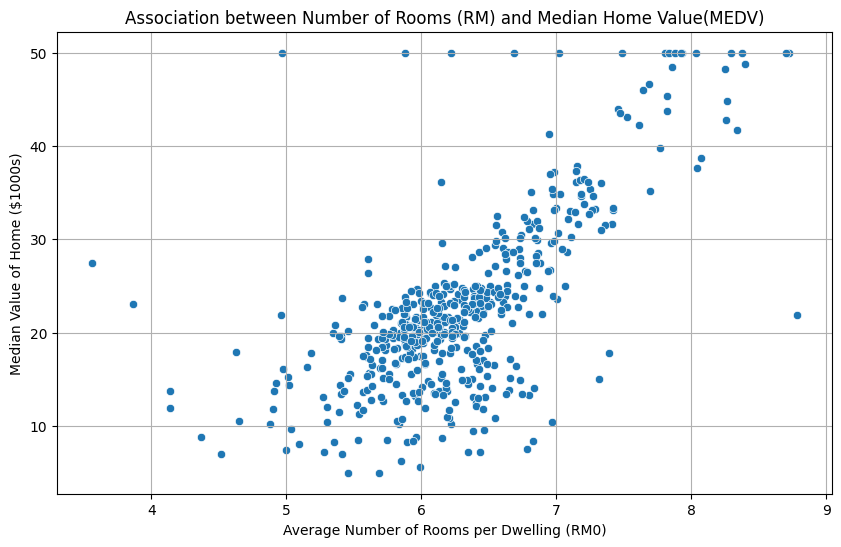

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = boston_df)
plt.title('Association between Number of Rooms (RM) and Median Home Value(MEDV)')
plt.xlabel('Average Number of Rooms per Dwelling (RM0)')
plt.ylabel('Median Value of Home ($1000s)')
plt.grid(True)
print("\nDisplayying scatter plot...")
plt.show()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
print("\n---Data Splitting---")
print("Training set size",len(x_train))
print("Test set size:",len(x_test))


---Data Splitting---
Training set size 339
Test set size: 167


In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
print("\n---Model Training---")
print("Linear Regression model has been sucessfully trained.")


---Model Training---
Linear Regression model has been sucessfully trained.


In [18]:
intercept = model.intercept_
coefficient = model.coef_[0]
print("\n---Model Parameters---")
print(f"Intercept (c) : {intercept:.4f}")
print(f"Coefficient for RM (m): {coefficient:.4f}")
print(f"The model equation is: MEDV = {coefficient:.4f} * RM + ({intercept:.4f})")


---Model Parameters---
Intercept (c) : -34.2224
Coefficient for RM (m): 9.0391
The model equation is: MEDV = 9.0391 * RM + (-34.2224)


In [19]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [20]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("\n---Model Evaluation---")
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print("-" * 20)


---Model Evaluation---
Training MSE: 45.8290
Testing MSE: 39.0911
--------------------


In [22]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("\n---Model Evaluation---")
print(f"Training R-squared: {r2_train:.4f}")
print(f"Testing R-squared: {r2_test:.4f}")
print("-" * 20)


---Model Evaluation---
Training R-squared: 0.4801
Testing R-squared: 0.4835
--------------------



Displayin regression line plot...


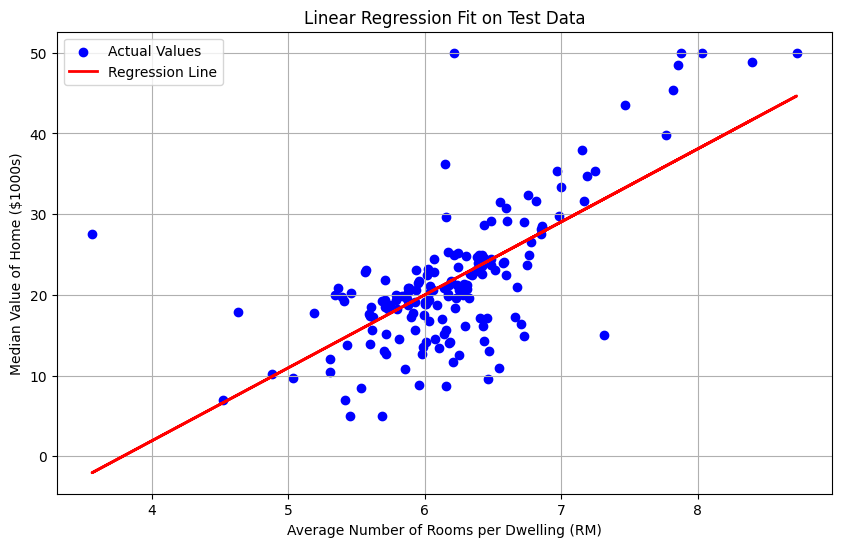

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label = 'Actual Values')
plt.plot(x_test, y_test_pred, color = 'red', linewidth = 2, label = 'Regression Line')
plt.title('Linear Regression Fit on Test Data')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Home ($1000s)')
plt.legend()
plt.grid(True)
print("\nDisplayin regression line plot...")
plt.show()